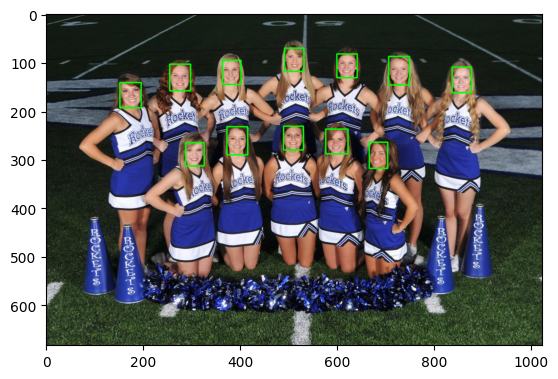

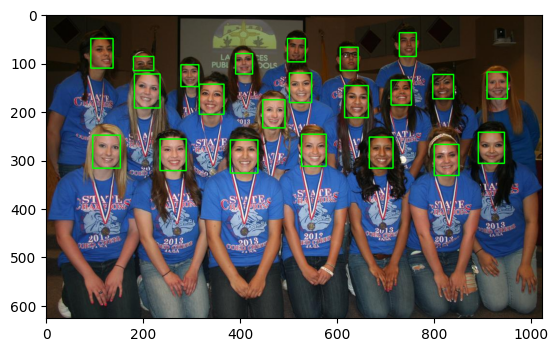

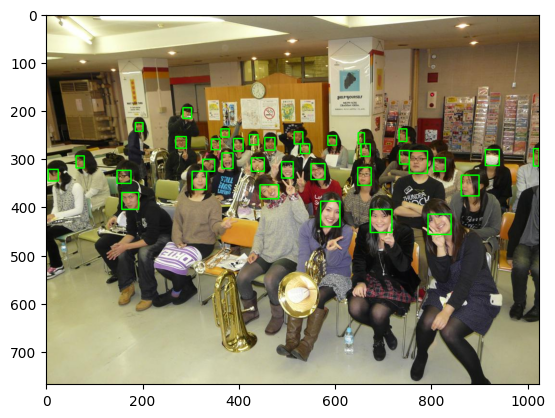

Checking cropped images...
7_Cheering_Cheering_7_74 12


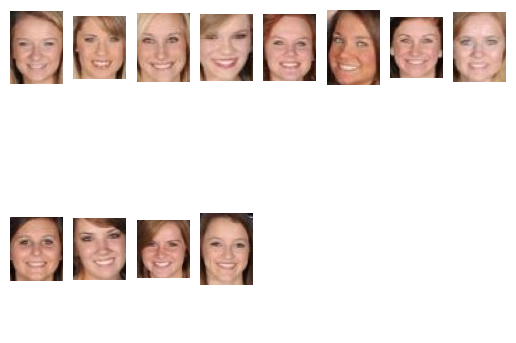

7_Cheering_Cheering_7_543 22


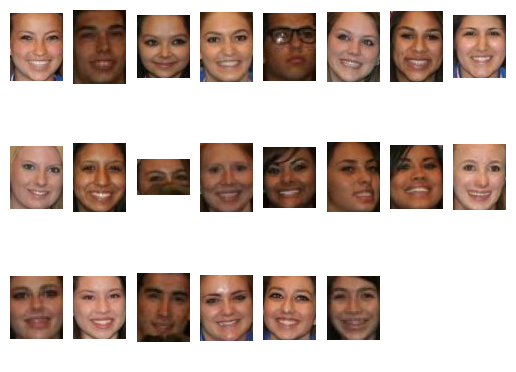

7_Cheering_Cheering_7_889 35


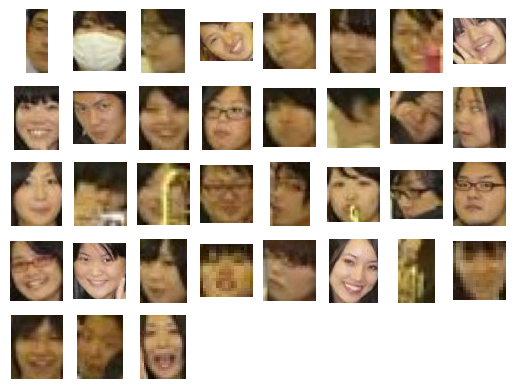

Face Detection using dlib:


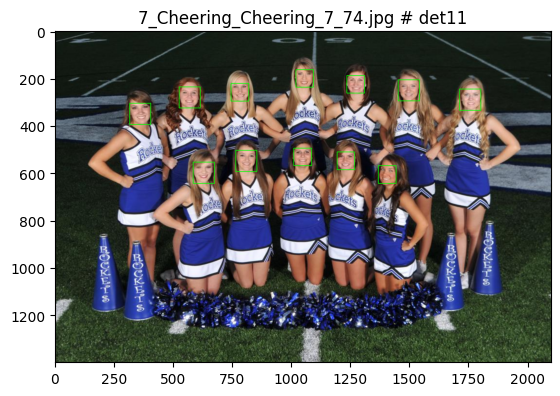

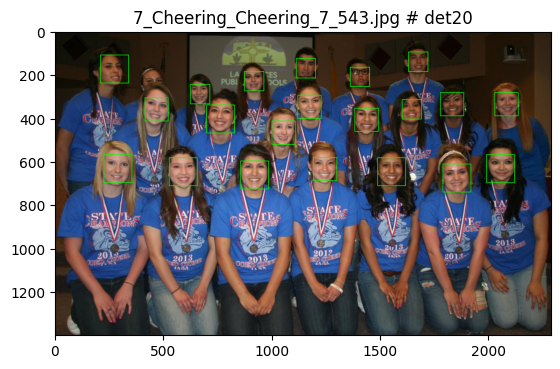

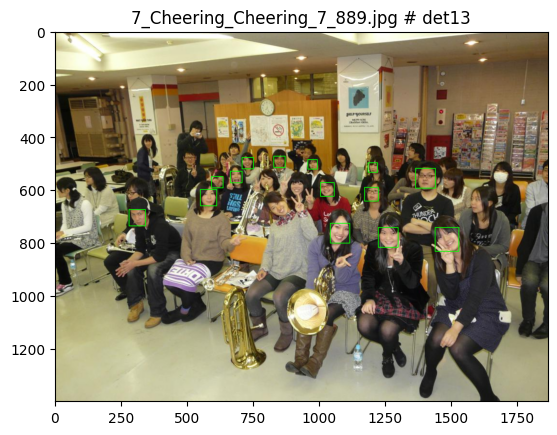

In [11]:
import os, sys
import pickle
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
%matplotlib inline

pkl_path = 'annotation.pkl'
annotate_dict = pickle.load(open(pkl_path,"rb"))
data_dir = 'data_dir'

def draw_bbox():
  for img_name in annotate_dict:
    img = cv2.imread(os.path.join(data_dir, img_name))
    for bbox in annotate_dict[img_name]:
      cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), thickness=2)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.imshow(img)
    plt.show()

def save_bbox():
  save_dir = 'save_dir' # Do not change this line
  if not os.path.exists(save_dir):
    os.mkdir(save_dir)
  for img_name in annotate_dict:
    img = cv2.imread(os.path.join(data_dir, img_name))
    for idx, bbox in enumerate(annotate_dict[img_name]):
      crop_img_name = f"{os.path.splitext(img_name)[0]}_{idx}_.jpg"
      crop_img = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
      cv2.imwrite(os.path.join(save_dir, crop_img_name), crop_img)
      
      
# Do not modify the following two functions. They will be used to check your code.
def display_img_list(img_list):
     col = 8
     row = int(np.ceil(len(img_list)/8))
     k = 0
     fig, ax = plt.subplots(row, col)
     for i in range(row):
       for j in range(col):
         k = j+i*col
         if k < len(img_list):
           ax[i,j].imshow(img_list[k])
         ax[i,j].axis('off')
     plt.show()

def check_bbox():
  save_dir = 'save_dir'
  data_dict = {}
  if not os.path.exists(save_dir):
     print('save_dir is not created!')
     return
  if len(os.listdir(save_dir)) < 10:
     print('cropped faces are not generated!')
     return
  for img_name in annotate_dict:
     img_name = img_name[:-4]
     data_dict[img_name] = []
     for bbox_name in os.listdir(save_dir):
       if img_name in bbox_name:
         bbox_path = os.path.join(save_dir, bbox_name)
         img = cv2.imread(bbox_path)
         data_dict[img_name].append(img[:,:,::-1])
  for img_name in data_dict:
     print(img_name, len(data_dict[img_name]))
     display_img_list(data_dict[img_name])

def test_dlib():
  # Enter your code here and remove the following pass (30%)
  detector = dlib.get_frontal_face_detector()
  for img_name in annotate_dict:
    img = cv2.imread(os.path.join(data_dir, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    width, height = img.shape[1], img.shape[0]
    aspect_ratio = width / height
    new_width, new_height = round(1400*aspect_ratio), 1400
    img = cv2.resize(img, (new_width, new_height))
    dets = detector(img, 1)
    for face_count, det in enumerate(dets):
      x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom()
      cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), thickness=2)
    plt.imshow(img)
    plt.title(f"{img_name} # det{face_count}")
    plt.show()
  

if __name__ == '__main__':
  # When submitting assignment_2a, please do not modify the following lines  
  draw_bbox()
  save_bbox()
  print('Checking cropped images...')  
  check_bbox()
  print('Face Detection using dlib:')
  test_dlib()
  pass